<a href="https://colab.research.google.com/github/aypy01/tensorflow/blob/main/fuel_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fuel Efficiency Prediction

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [ ]:
!pip install tensorflow

!pip install -q seaborn



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

##Dataset

###Downloading the Data

In [ ]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin','Car_Name']

dataset = pd.read_csv(
    url,
    names=column_names,
    na_values='?',        # correct: not `na_vlaues`
    comment='\t',
    sep='\\s+',            # correct separator for whitespace
    skipinitialspace=True
)

dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
#Dropping Car_Name as its not a feature and works as a noise
dataset = dataset.drop(columns=["Car_Name"])

dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
dataset.shape

(398, 8)

###Cleaning data

In [ ]:
#data set hav the few unknwn values
dataset.isna().sum()

#Theres only horse power is what have not available column we will drop it

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
dataset=dataset.dropna() #Using drop na coz we do not want to loose whole column butthe na ones onle
dataset.isna().sum() #Now the horsepower colums is 0

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
dataset.dtypes #Here the origin dtatype is int64

,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model Year,int64
Origin,int64


In [ ]:
#As seen the Origin column is categorical columns, we have one hot encode it
dataset['Origin']=dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'}) #tells as dicctionary 1 for USA 2 Europe and 3 for Japan
dataset.dtypes #Now origin becomes object


,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model Year,int64
Origin,object


In [ ]:
#One-hot Encoded
dataset=pd.get_dummies(dataset,columns=['Origin'])
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [ ]:
dataset.dtypes #Here the origin dtatype is bool

,0
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model Year,int64
Origin_Europe,bool
Origin_Japan,bool
Origin_USA,bool


In [ ]:
dataset.shape #As the origin now the 3 col

(392, 10)

##Splitting Data in Test/Train

In [ ]:
train_dataset=dataset.sample(frac=0.8, random_state=0)#This is with labels, what datase.sample?
test_dataset=dataset.drop(train_dataset.index) #The remaining datapoints 20% will be in out testset
#Usually sklearn does the test_train_spli part but manuallu doing is also not bad

#Spliting train and test
x_train=train_dataset
y_train=x_train.pop('MPG')

x_test=test_dataset
y_test=x_test.pop("MPG")

In [ ]:
x_train.head(3) #No MPG

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True


###Inspecting the datset

array([[<Axes: title={'center': 'Displacement'}>,
        <Axes: title={'center': 'Cylinders'}>],
       [<Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Acceleration'}>,
        <Axes: title={'center': 'Model Year'}>]], dtype=object)

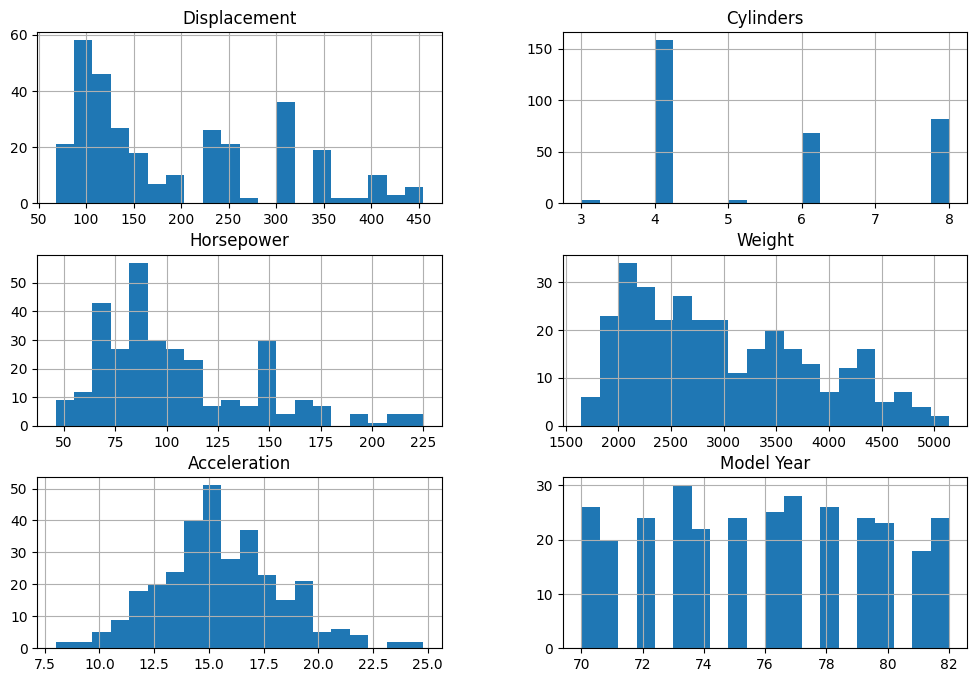

In [ ]:
# Best for multi-feature histogram (bins=20)
x_train[['Displacement', 'Cylinders',
               'Horsepower', 'Weight', 'Acceleration',
               'Model Year']].hist(bins=20, figsize=(12, 8))
#Seeing graph its clear that features need scaling/normalizing

###Matplotlib

##Normalization

In [ ]:
#Normalization
#Its like Standard Scaler kinda preprocessing
from tensorflow.keras import layers

x_train=x_train.astype(np.float32)
x_test=x_test.astype(np.float32)

#Normalizer Layer
normalizer=tf.keras.layers.Normalization(axis=-1)

#Fitting features
normalizer.adapt(np.array(x_train))


## Linear Regression

* DNN= deep neural network


* input in normalization layer

*   Let this be 2 hidden layers for non linear
*  A single layer linear output







##Model

In [ ]:
from tensorflow.keras import models,layers
model=models.Sequential([
    normalizer,
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1) #In regression the output layer is not goes through any activation

])

##Compile

In [ ]:
#Compile
model.compile(optimizer='Adam',
              loss='mean_absolute_error', #Good for Regression
              #Metrics is not that much relevant on regression
              )

##Training

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 23.0172 - val_loss: 23.0991
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 22.3876 - val_loss: 22.5130
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.8840 - val_loss: 21.6836
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.3796 - val_loss: 20.5221
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 20.0559 - val_loss: 18.8521
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.1513 - val_loss: 16.4653
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 16.0685 - val_loss: 14.0221
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 13.6786 - val_loss: 11.4715
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.2392 - val_loss: 8.9547
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 7.6136 - val_loss: 7.3330
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.8602 - val_loss: 6.8095
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.5996 - v

##Evaluate

In [ ]:
model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.8139 


1.9762213230133057

For better repesentattion , used pandas dataframe

##Prediction

In [ ]:
prediction=model.predict(x_test) #.flatten() converts the 2D output to a 1D list.
# the prediction is in 2d array so for tabular form like we feeding have to be flatten
#	MPG	Cylinders	Displacement	Horsepower	Weight	Acceleration	Model Year

#Visualization
results = x_test# 9 features: Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year, Origin_Europe, Origin_Japan, Origin_USA
results['Predicted MPG'] = prediction.flatten()  # 1 column
print(results.head())



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
    Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
9         8.0         390.0       190.0  3850.0           8.5        70.0   
25        8.0         360.0       215.0  4615.0          14.0        70.0   
28        8.0         304.0       193.0  4732.0          18.5        70.0   
31        4.0         113.0        95.0  2228.0          14.0        71.0   
33        6.0         232.0       100.0  2634.0          13.0        71.0   

    Origin_Europe  Origin_Japan  Origin_USA  Predicted MPG  
9             0.0           0.0         1.0      16.278385  
25            0.0           0.0         1.0      11.967526  
28            0.0           0.0         1.0      11.627963  
31            0.0           1.0         0.0      24.052246  
33            0.0           0.0         1.0      18.342358  




```
Note :
The sequence must be run in order, otherwise the Prediction column show error
```



##Saving model

In [ ]:
#Saving the model
model.save('fuel_efficiency.keras')

##Summary

###Dataset Preparation
- Dropped irrelevant column (`Car Name`).
- `Origin` column (1=USA, 2=Europe, 3=Japan) was one-hot encoded → dataset grew from 8 → 10 columns.
- Checked for missing values → only `Horsepower` had NaNs. Dropped rows with missing horsepower.
- Train-test split: 80/20 using `.sample()`.
- Target variable (`MPG`) extracted with `x_train.pop('MPG')`.

### Preprocessing
- Applied TensorFlow `Normalization` layer on features.
- Converted `x_train` to `np.float32` before `.adapt()`.
- Ensured normalization applied to test set as well (without re-adapting).

### Model
- Sequential model:
  - Input: Normalization layer.
  - Output: `Dense(1)` with no activation (regression).
- Loss: `mean_absolute_error`.
- Optimizer: Adam.
- No metrics (accuracy irrelevant for regression).

### Training & Evaluation
- Fitted with validation split = 0.2, multiple epochs.
- Evaluated with MAE ≈ `1.8139` .
- Predictions flattened to 1-D using `.flatten()`.
- Saved model as `regression.keras`.
